In [1]:
import pandas as pd

DADOS = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


preprocessing = ColumnTransformer(
    [
        ("standard", StandardScaler(), ["Age", "Annual Income (k$)", "Spending Score (1-100)"]),
        ("onehot", OneHotEncoder(), ["Gender"])
    ]
)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

RANDOM_STATE = 42

pipeline = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("pca", PCA (n_components=3, random_state=RANDOM_STATE)),
        ("clustering", KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [5]:
import joblib

joblib.dump(pipeline, "../modelos/pipeline_preprocessing_pca_clustering.pkl")

['../modelos/pipeline_preprocessing_pca_clustering.pkl']

In [6]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [7]:
pipeline["clustering"].labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [8]:
df_clustered = df.copy()
df_clustered["cluster"] = pipeline["clustering"].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


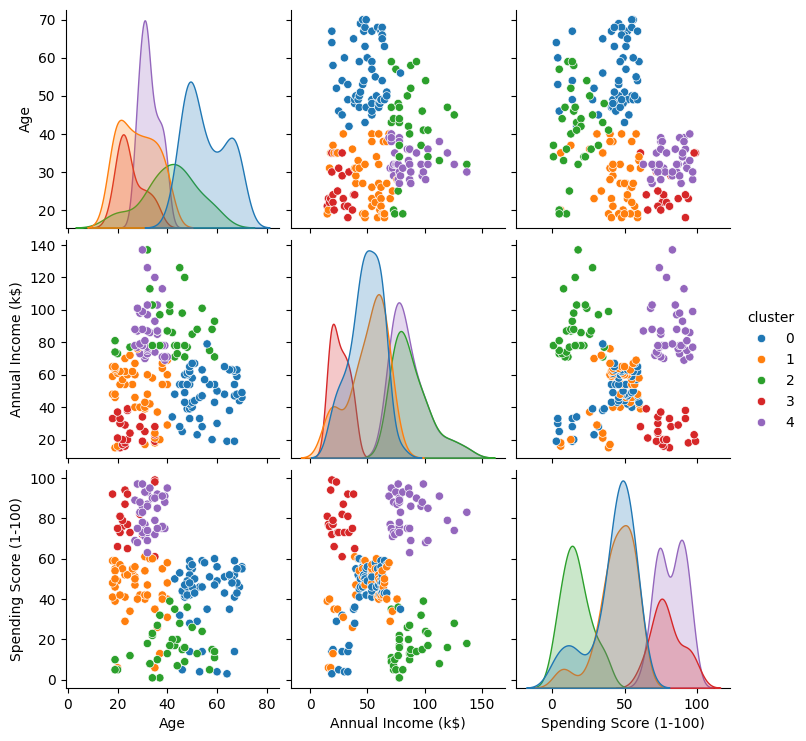

In [9]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind="kde", hue="cluster", palette="tab10");

C:\Users\c1r6\AppData\Local\Temp\ipykernel_13820\1790495880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
C:\Users\c1r6\AppData\Local\Temp\ipykernel_13820\1790495880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
C:\Users\c1r6\AppData\Local\Temp\ipykernel_13820\1790495880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")


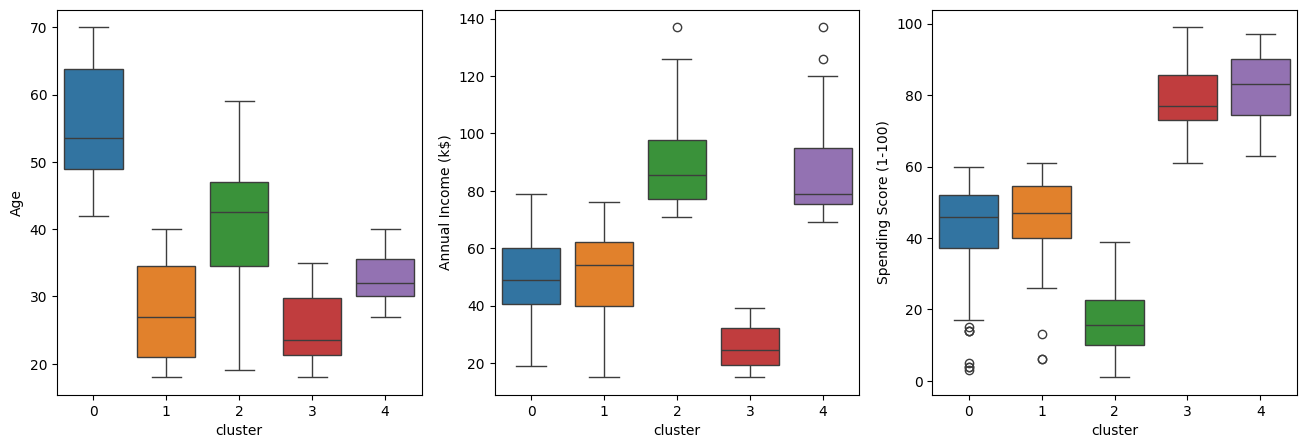

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, palette="tab10")
    
plt.show()

In [11]:
df_clustered["cluster"].value_counts().sort_index()

cluster
0    58
1    47
2    34
3    22
4    39
Name: count, dtype: int64

In [12]:
df_clustered.groupby(["cluster", "Gender"]).size()

cluster  Gender
0        Female    33
         Male      25
1        Female    31
         Male      16
2        Female    14
         Male      20
3        Female    13
         Male       9
4        Female    21
         Male      18
dtype: int64

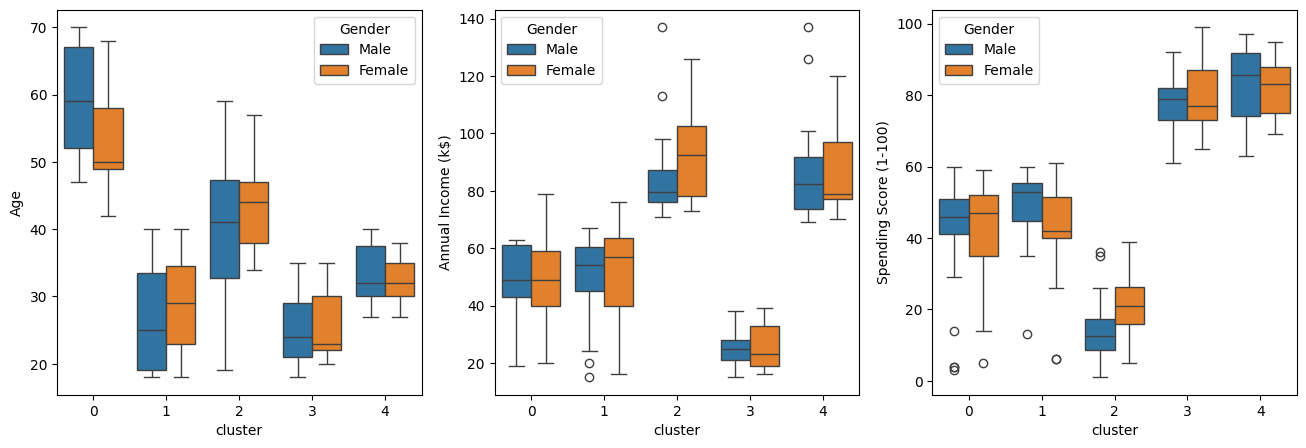

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col, ax=ax, hue="Gender")
    
plt.show()

In [14]:
pipeline["preprocessing"].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [15]:
pipeline["pca"].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [ 0.70661643,  0.00434967,  0.70753413, -0.00590595,  0.00590595]])

In [16]:
pipeline["pca"].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [18]:
pipeline["clustering"].cluster_centers_

array([[ 1.09281997, -0.42702742,  0.61346816],
       [-0.39283157, -0.42287385, -0.70807382],
       [ 1.00944112,  1.11828568, -0.78954352],
       [-1.4357643 , -1.37856558,  0.10638215],
       [-1.2219143 ,  0.94742028,  0.56929202]])

In [19]:
pipeline[:-1].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [20]:
pipeline[:-1]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42))])

In [24]:
df_pca = pd.DataFrame(
    pipeline[:-1].fit_transform(df),
    columns=pipeline[:-1].get_feature_names_out()
)

df_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,-1.315210
1,-1.623595,-1.726481,-0.060149
2,0.279614,-1.725314,-2.182574
3,-1.511064,-1.796205,-0.080242
4,-0.095468,-1.707347,-0.690684


In [25]:
centroids = pipeline["clustering"].cluster_centers_

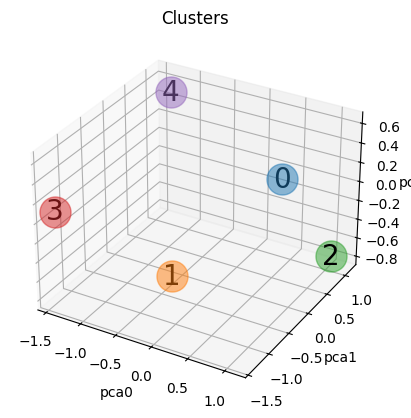

In [26]:
from funcoes_auxiliares import visualizar_clusters

visualizar_clusters(
    dataframe=df_pca,
    colunas=['pca0', 'pca1', 'pca2'],
    quantidade_cores=5,
    centroids=centroids,
)

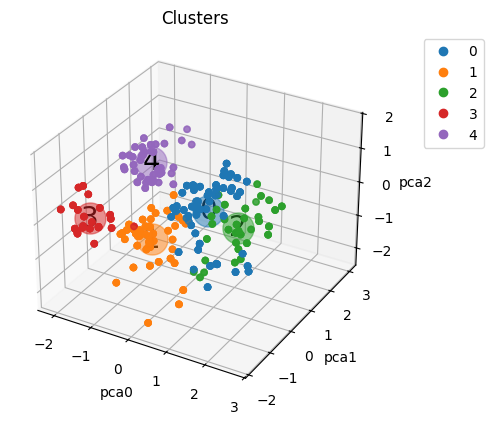

In [27]:
from funcoes_auxiliares import visualizar_clusters

visualizar_clusters(
    dataframe=df_pca,
    colunas=['pca0', 'pca1', 'pca2'],
    quantidade_cores=5,
    centroids=centroids,
    mostrar_pontos=True,
    coluna_clusters=df_clustered["cluster"]

)